In [1]:
# scrapy의 문법

### Iterator(순서있음), Generator
- iterable : 순서가 있는 데이터 집합
- iterator : 반복적으로 실행할때마다 다른 결과값이 나오는 함수, 값 생성기
- iteration : iterator에서 값을 가져오는 행위

In [3]:
# 이터레이터 만들기
ls = [1, 2, 3]
it = iter(ls)

In [12]:
# 이터레이션 함수
next(it)

StopIteration: 

In [17]:
# 피보나치수열을 객체로 만들어낼수 있는 클래스 만들기

class Fib:
    def __init__(self):
        self.prev = 0
        self.curr = 1

    ## 특별한 method   -> method=class안에있는 함수
    def __next__(self):   # next함수 : 재정의해준다
        value = self.curr
        self.curr += self.prev
        self.prev = value
#         self.prev, self.curr = self.curr, self.prev + self.curr
        return value     

#### python 홈페이지 첫 화면에 있는 피보나치수열
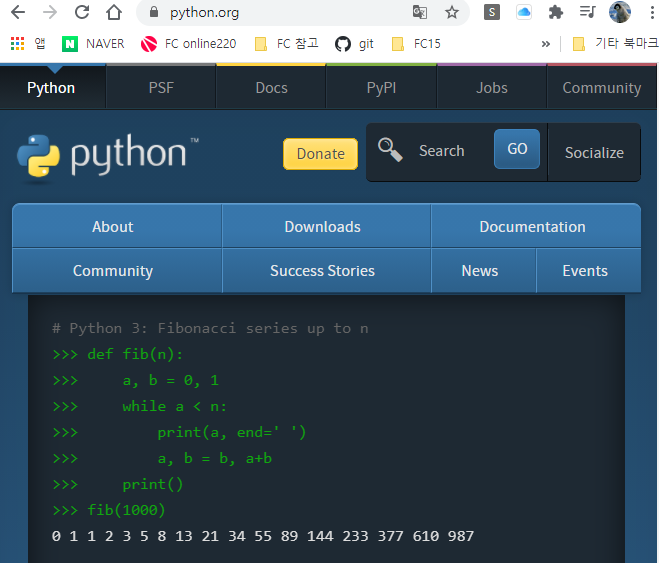

In [18]:
# 객체로 만들기
fib = Fib()

In [19]:
# 피보나치수열 출력
for _ in range(10):
    print(next(fib), end=" ")

1 1 2 3 5 8 13 21 34 55 

#### 제너레이터
- 이터레이터를 간단하게 만든것
- iter(), next() 함수들을 사용해서 클래스로 작성하는 번거로움이 없음;
- yield, yield from : 함수에 yield, yield from이 있으면 그 함수가 제너레이터 함수

In [20]:
# 제너레이터 : yield 라는 예약어를 쓰면 더 간단하게 만들수 있다.
# - 함수가 실행하다가 yield를 만날때마다  데이터 1개 리턴하고 멈춘다.

In [22]:
def fib():
    prev, curr = 0, 1
    while True:
        yield curr    
        prev, curr = curr, prev + curr

In [23]:
%whos

Variable   Type             Data/Info
-------------------------------------
Fib        type             <class '__main__.Fib'>
fib        function         <function fib at 0x7f93342c58c8>
it         list_iterator    <list_iterator object at 0x7f9334b38438>
ls         list             n=3


In [25]:
f = fib()
for _ in range(10):
    print(next(f), end=" ")

1 1 2 3 5 8 13 21 34 55 

In [26]:
def test():
    yield 1
    yield 2
    yield 3

In [27]:
t = test()

In [31]:
next(t)

StopIteration: 

In [33]:
### yield from

def test1():
    ls = [1, 2, 3]
    yield ls

In [34]:
t1 = test1()

In [36]:
next(t1)  # [1,2,3] -> stop!!

StopIteration: 

In [37]:
def test2():
    ls = [1, 2, 3]
    yield from ls

In [38]:
t2 = test2()

In [42]:
next(t2)  # 1 -> 2 -> 3 -> stop!!

StopIteration: 

#### Comprehension
- list, set, dict

In [43]:
## list comprehension
## - 반복문을 써서 나온 결과값 데이터들을 리스트로 만들어냄

[number * number for number in range(5)]

[0, 1, 4, 9, 16]

In [45]:
## set comprehension 
## - yield로 나온 결과값 데이터를 set으로 만들어줌. 중복된데이터 사라짐.

{number % 3 for number in range(5)}

{0, 1, 2}

In [46]:
## dict comprehension

{number: number * number for number in range(5)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}